In [116]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from scipy.stats import f_oneway

In [ ]:
# Visualisation du head

df = pd.read_excel('historique_immobilier_paris_2017_2021_vdef2.xlsx')
df.head(20)

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15
5,2017-01-06,3.845522e+05,27,RUE DU COLISEE,75008,Paris 8e Arrondissement,2,Appartement,39
6,2017-01-05,7.542632e+05,266,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,75
7,2017-01-12,1.166411e+06,195,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,117
8,2017-01-16,3.609180e+05,22,RUE MESLAY,75003,Paris 3e Arrondissement,2,Appartement,33
9,2017-01-25,4.251346e+05,101,RUE BEAUBOURG,75003,Paris 3e Arrondissement,2,Appartement,38


In [118]:
# Infos générales du Df avec intégration du prix au m2
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26196 entries, 0 to 26195
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_mutation     26196 non-null  datetime64[ns]
 1   valeur_fonciere   26196 non-null  float64       
 2   adresse_numero    26196 non-null  int64         
 3   adresse_nom_voie  26196 non-null  object        
 4   code_postal       26196 non-null  int64         
 5   nom_commune       26196 non-null  object        
 6   code_type_local   26196 non-null  int64         
 7   type_local        26196 non-null  object        
 8   surface_reelle    26196 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 1.8+ MB


(26196, 9)

In [ ]:
# Détermination du nombre de doublons

print(df.duplicated().sum())

16


In [ ]:
# Détermination des valeurs manquantes

df.isnull().sum()

date_mutation       0
valeur_fonciere     0
adresse_numero      0
adresse_nom_voie    0
code_postal         0
nom_commune         0
code_type_local     0
type_local          0
surface_reelle      0
dtype: int64

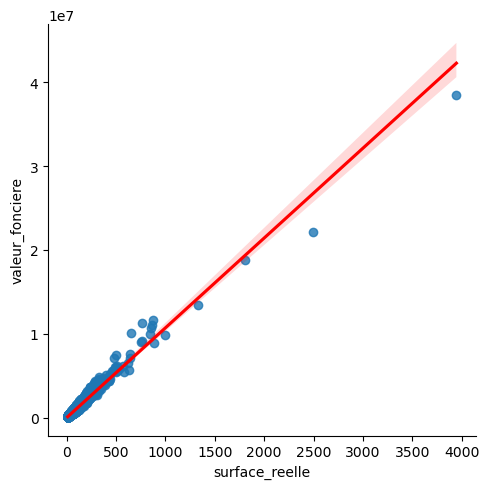

In [121]:
# Visualisation relation valeur / surface
sns.lmplot(x = 'surface_reelle', y = 'valeur_fonciere', data = df, line_kws={'color': 'red'})

In [ ]:
# Calcul moy prix au m2 par code_type selon type de bien

df['prix_m2'] = df['valeur_fonciere'] / df['surface_reelle']
moy_prix_m2_type_local = df.groupby('code_type_local')['prix_m2'].mean()
moy_prix_m2_type_local



code_type_local
2    10221.630328
4    11705.022693
Name: prix_m2, dtype: float64

In [ ]:
# Moyenne et std valeur foncière

mean_vf =df['valeur_fonciere'].mean()
std_vf = df['valeur_fonciere'].std()
print(f"La valeur foncière moyenne est de {mean_vf}, l'ecart type est de {std_vf}")

La valeur foncière moyenne est de 491616.9896967827, l'ecart type est de 571329.2352747569


In [124]:
# prix moy au m2 par arrondissement tout type_local
moy_prix_m2_code_postal = df.groupby('code_postal')['prix_m2'].mean().sort_index()
moy_prix_m2_code_postal

code_postal
75001    12997.849088
75002    11778.463196
75003    12592.586285
75004    13224.636391
75005    12405.648427
75006    13280.010482
75007    12773.668327
75008    11168.271294
75009    10590.180551
75010     9728.377102
75011    10048.693358
75012     9275.674825
75013     9043.411467
75014     9759.247363
75015     9693.028278
75016    10573.502690
75017    10150.143451
75018     9484.292583
75019     8566.594188
75020     8800.116029
Name: prix_m2, dtype: float64

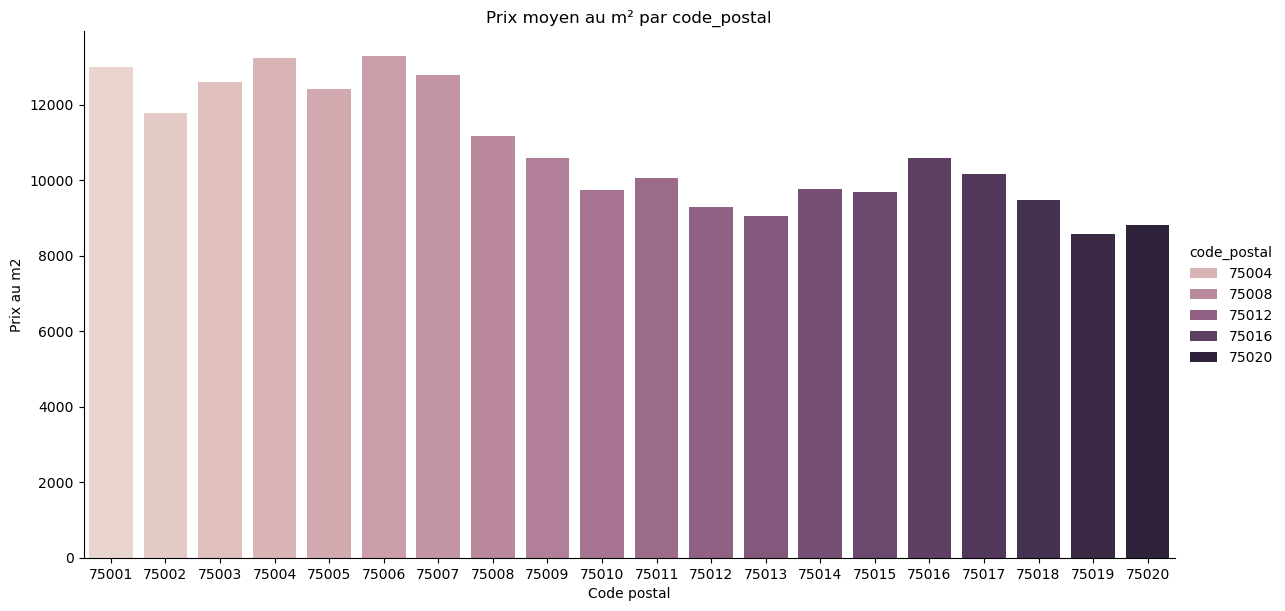

In [125]:
# Visualisation du prix du m2 par arrondissement

moy_prix_m2_code_postal_df = moy_prix_m2_code_postal.reset_index()
moy_prix_m2_code_postal_df.columns = ['code_postal', 'prix_m2']
sns.catplot(x = 'code_postal', y = 'prix_m2', kind='bar', hue='code_postal', data=moy_prix_m2_code_postal_df, height=6, aspect=2)
plt.ylabel("Prix au m2")
plt.xlabel("Code postal")
plt.title("Prix moyen au m² par code_postal")
plt.show()

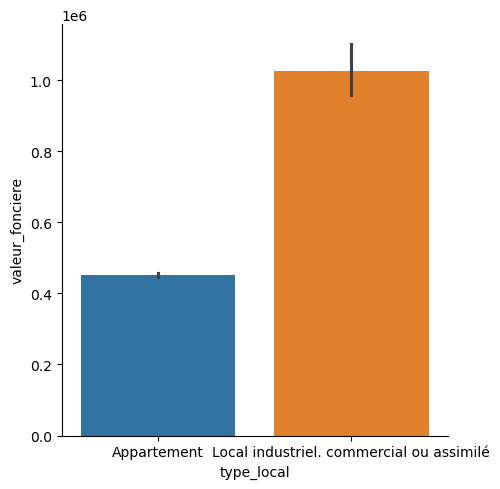

In [126]:
# Représentation total valeur foncière par type de local
sns.catplot(x = 'type_local', y = 'valeur_fonciere', data=df, kind='bar', hue='type_local')

In [127]:
# Créer un tableau croisé dynamique avec pd.crosstab
tableau_croise = pd.crosstab(df['type_local'], df['code_postal'])

# Ajouter la colonne "total" (total par ligne)
tableau_croise['Total'] = tableau_croise.sum(axis=1)

# Ajouter une ligne "Total" (total par colonne)
tableau_croise.loc['Total'] = tableau_croise.sum(axis=0)

# Afficher la transposée du tableau croisé final
display(tableau_croise.T)


type_local,Appartement,Local industriel. commercial ou assimilé,Total
code_postal,,,
75001,409,59,468
75002,666,67,733
75003,784,93,877
75004,548,42,590
75005,829,81,910
75006,709,73,782
75007,607,60,667
75008,628,140,768
75009,969,119,1088


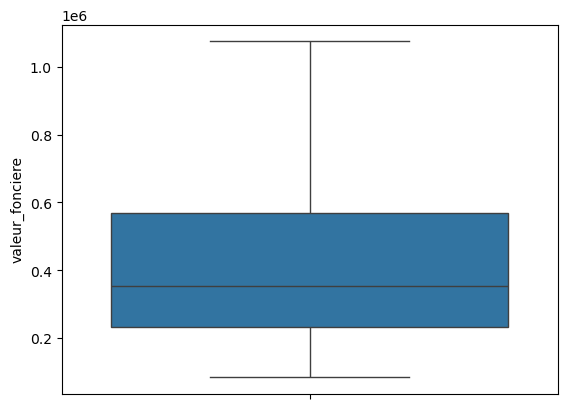

In [128]:
sns.boxplot(y=df['valeur_fonciere'], showfliers=False)
plt.show()

In [129]:
# df avec les colones retirées

df_clean = df.drop(['adresse_numero', 'adresse_nom_voie','nom_commune'], axis=1)
df_clean

,date_mutation,valeur_fonciere,code_postal,code_type_local,type_local,surface_reelle,prix_m2
0,2017-01-03,5.505597e+05,75003,2,Appartement,50,11011.193562
1,2017-01-12,1.576492e+06,75008,2,Appartement,163,9671.732877
2,2017-01-10,6.577574e+05,75008,2,Appartement,66,9966.020548
3,2017-01-10,2.500868e+05,75003,2,Appartement,22,11367.582877
4,2017-01-13,1.762667e+05,75001,2,Appartement,15,11751.113836
...,...,...,...,...,...,...,...
26191,2021-02-25,4.712239e+05,75004,2,Appartement,37,12735.781918
26192,2021-02-17,1.982330e+06,75002,4,Local industriel. commercial ou assimilé,150,13215.536370
26193,2021-03-08,3.124359e+05,75002,2,Appartement,26,12016.765753
26194,2021-03-11,1.562234e+05,75002,2,Appartement,13,12017.182877


In [130]:
# Visualisation après retrait des colonnes

display(df_clean.describe(include="all"))

,date_mutation,valeur_fonciere,code_postal,code_type_local,type_local,surface_reelle,prix_m2
count,26196,2.619600e+04,26196.000000,26196.000000,26196,26196.000000,26196.000000
unique,NaN,NaN,NaN,NaN,2,NaN,NaN
top,NaN,NaN,NaN,NaN,Appartement,NaN,NaN
freq,NaN,NaN,NaN,NaN,24353,NaN,NaN
mean,2019-06-09 14:09:14.099862784,4.916170e+05,75012.716216,2.140709,NaN,46.859940,10325.993289
min,2017-01-02 00:00:00,8.519470e+04,75001.000000,2.000000,NaN,11.000000,7196.488356
25%,2018-03-14 00:00:00,2.339439e+05,75009.000000,2.000000,NaN,23.000000,9320.798801
50%,2019-05-23 00:00:00,3.545774e+05,75014.000000,2.000000,NaN,35.000000,10035.672260
75%,2020-09-16 00:00:00,5.702197e+05,75017.000000,2.000000,NaN,55.000000,10941.129041
max,2021-12-31 00:00:00,3.843359e+07,75020.000000,4.000000,NaN,3945.000000,15547.797808


In [131]:
# création colonne date en toordinal

df_clean['date_toordinal'] = df_clean.date_mutation. apply(lambda date: np.uint32(date.toordinal()))
df_clean


,date_mutation,valeur_fonciere,code_postal,code_type_local,type_local,surface_reelle,prix_m2,date_toordinal
0,2017-01-03,5.505597e+05,75003,2,Appartement,50,11011.193562,736332
1,2017-01-12,1.576492e+06,75008,2,Appartement,163,9671.732877,736341
2,2017-01-10,6.577574e+05,75008,2,Appartement,66,9966.020548,736339
3,2017-01-10,2.500868e+05,75003,2,Appartement,22,11367.582877,736339
4,2017-01-13,1.762667e+05,75001,2,Appartement,15,11751.113836,736342
...,...,...,...,...,...,...,...,...
26191,2021-02-25,4.712239e+05,75004,2,Appartement,37,12735.781918,737846
26192,2021-02-17,1.982330e+06,75002,4,Local industriel. commercial ou assimilé,150,13215.536370,737838
26193,2021-03-08,3.124359e+05,75002,2,Appartement,26,12016.765753,737857
26194,2021-03-11,1.562234e+05,75002,2,Appartement,13,12017.182877,737860


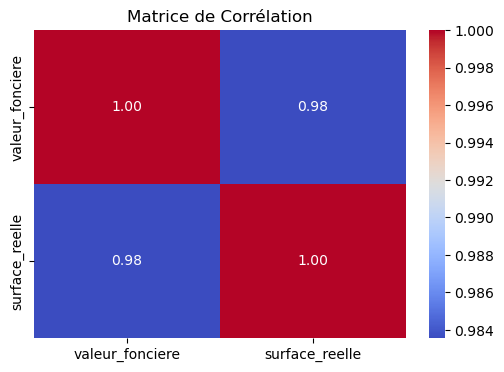

In [132]:
# Matrice de corrélation

df_numeric = df[['valeur_fonciere', 'surface_reelle']]

plt.figure(figsize=(6, 4))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation")
plt.show()

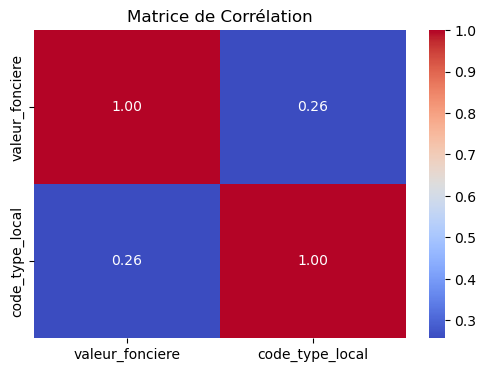

In [133]:
df_numeric = df[['valeur_fonciere', 'code_type_local']]

# Matrice de corrélation
plt.figure(figsize=(6, 4))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation")
plt.show()

In [134]:
# Intervalle de confiance

mean = df_clean['valeur_fonciere'].mean()
n = df_clean['valeur_fonciere'].count()
std = df_clean['valeur_fonciere'].std()
print(mean, std, n)

491616.9896967827 571329.2352747569 26196


In [135]:
# confidence = 0.95

t = 1.96

In [136]:
# Intervalle de confiance - Formule : moy + ou - 1.96 *(std/sqrt de n)

IdC_upper = mean + t * (std / n**0.5)
IdC_lower = mean - t * (std / n**0.5)
print(f"Intervalle de confiance : [{IdC_lower}, {IdC_upper}]")

Intervalle de confiance : [484698.28127651487, 498535.6981170506]


In [140]:
# separate target variable Y from features x
features_list = df_clean[['code_postal', 'code_type_local', 'surface_reelle', 'date_toordinal']]
x = features_list
y = df_clean['valeur_fonciere']


display(x,y)

,code_postal,code_type_local,surface_reelle,date_toordinal
0,75003,2,50,736332
1,75008,2,163,736341
2,75008,2,66,736339
3,75003,2,22,736339
4,75001,2,15,736342
...,...,...,...,...
26191,75004,2,37,737846
26192,75002,4,150,737838
26193,75002,2,26,737857
26194,75002,2,13,737860


0        5.505597e+05
1        1.576492e+06
2        6.577574e+05
3        2.500868e+05
4        1.762667e+05
             ...     
26191    4.712239e+05
26192    1.982330e+06
26193    3.124359e+05
26194    1.562234e+05
26195    3.694294e+05
Name: valeur_fonciere, Length: 26196, dtype: float64

In [141]:
# train test
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.33,
                                                    random_state=0
                                                    )

In [142]:
print("#### x_train BEFORE preprocessing ####")
print(x_train.head())

#### x_train BEFORE preprocessing ####
       code_postal  code_type_local  surface_reelle  date_toordinal
25591        75015                2              15          737889
14516        75016                2              39          737346
21508        75010                2              27          737921
7614         75011                2              12          737021
12940        75011                2              33          737335


In [143]:
# training pipeline
numeric_features = ['code_type_local','surface_reelle','date_toordinal']
numeric_transfomer = StandardScaler()

categorical_features=['code_postal']
categorical_transformer = OneHotEncoder()

feature_encoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transfomer, numeric_features)
    ]
)

x_train_scaled = feature_encoder.fit_transform(x_train)
print("### x_train AFTER preprocessing ###")
print(x_train_scaled[0:5,:])

### x_train AFTER preprocessing ###
  (0, 14)	1.0
  (0, 20)	-0.2758410582074584
  (0, 21)	-0.6506943872688792
  (0, 22)	1.269166384005642
  (1, 15)	1.0
  (1, 20)	-0.2758410582074584
  (1, 21)	-0.15945747285293813
  (1, 22)	0.2426660191466033
  (2, 9)	1.0
  (2, 20)	-0.2758410582074584
  (2, 21)	-0.40507593006090864
  (2, 22)	1.329659959835272
  (3, 10)	1.0
  (3, 20)	-0.2758410582074584
  (3, 21)	-0.7120990015708718
  (3, 22)	-0.37172186037307914
  (4, 10)	1.0
  (4, 20)	-0.2758410582074584
  (4, 21)	-0.2822667014569234
  (4, 22)	0.22187135245516787


In [144]:
# Données cohérentes par rapport au train
print("Train model...")
regressor = LinearRegression()
regressor.fit(x_train_scaled, y_train)
print("...Done.")

Train model...
...Done.


In [145]:
# prediction
print("Predictions on training set...")
y_train_pred = regressor.predict(x_train_scaled)
print("...Done.")
print(y_train_pred[:5])

Predictions on training set...
...Done.
[139192.54177631 407700.26240098 266908.13478264  90386.56999962
 328854.05656895]


In [146]:
y_train.head()

25591    151314.589726
14516    424032.137260
21508    274369.790959
7614     120876.884384
12940    351518.106575
Name: valeur_fonciere, dtype: float64

In [147]:
# testing
print("Standardizing numerical features...")
print(x_test)
print()

x_test_scaled = feature_encoder.transform(x_test)

print("...Done.")
print(x_test_scaled[:5]) # print first 5 rows (not using iloc since now X_test became a numpy array)
print()


Standardizing numerical features...
       code_postal  code_type_local  surface_reelle  date_toordinal
812          75005                2              15          736538
11259        75008                2              13          737277
23361        75002                2              12          738145
23239        75020                2              47          738123
16622        75002                4              57          737370
...            ...              ...             ...             ...
14582        75016                2              69          737392
2846         75015                2              23          736382
17761        75010                2              48          737773
19650        75017                2              25          737612
14904        75017                2              26          737273

[8645 rows x 4 columns]

...Done.
  (0, 4)	1.0
  (0, 20)	-0.2758410582074584
  (0, 21)	-0.6506943872688792
  (0, 22)	-1.284796770551561
  (1, 7)	1.

In [148]:
# prediction sur test
print("Predictions on test set...")
y_test_pred = regressor.predict(x_test_scaled)
print("...Done.")
print(y_test_pred[:5])
print()

Predictions on test set...
...Done.
[194129.64579594 174508.49354205 209718.06540654 465046.88358676
 748634.8115055 ]



In [149]:
# performance
print("R2 score on training set : ", regressor.score(x_train_scaled, y_train))
print("R2 score on test set : ", regressor.score(x_test_scaled, y_test))

R2 score on training set :  0.9779079457622544
R2 score on test set :  0.9869393910180867


In [150]:
# Features important
print("coefficients are: ", regressor.coef_)
print("Constant is: ", regressor.intercept_)

coefficients are:  [ 107841.79420155   37722.73897558   69666.3151906   112391.56476684
   55095.03425652  139143.43676771  115909.99192304   26985.18013045
  -20051.5786938   -57230.99639305  -36000.14623757  -71286.58244826
  -75711.10024542  -49791.1156528   -54661.67151736  -22093.5140699
  -38248.4585977   -57115.72171036 -100298.93769432  -82266.23295174
   22215.37182928  525149.67147671   21464.52334539]
Constant is:  514452.01719485363


In [151]:
print(x_train_scaled[:5])

  (0, 14)	1.0
  (0, 20)	-0.2758410582074584
  (0, 21)	-0.6506943872688792
  (0, 22)	1.269166384005642
  (1, 15)	1.0
  (1, 20)	-0.2758410582074584
  (1, 21)	-0.15945747285293813
  (1, 22)	0.2426660191466033
  (2, 9)	1.0
  (2, 20)	-0.2758410582074584
  (2, 21)	-0.40507593006090864
  (2, 22)	1.329659959835272
  (3, 10)	1.0
  (3, 20)	-0.2758410582074584
  (3, 21)	-0.7120990015708718
  (3, 22)	-0.37172186037307914
  (4, 10)	1.0
  (4, 20)	-0.2758410582074584
  (4, 21)	-0.2822667014569234
  (4, 22)	0.22187135245516787


In [152]:
# Access transformers from feature_encoder
print("All transformers are: ", feature_encoder.transformers)

All transformers are:  [('cat', OneHotEncoder(), ['code_postal']), ('num', StandardScaler(), ['code_type_local', 'surface_reelle', 'date_toordinal'])]


In [153]:
categorical_column_names = feature_encoder.transformers_[0][1].categories_
numerical_column_names = x[numeric_features].columns
print("numerical columns are: ", numerical_column_names,"categorical columns are: ", categorical_column_names)

numerical columns are:  Index(['code_type_local', 'surface_reelle', 'date_toordinal'], dtype='object') categorical columns are:  [array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020], dtype=int64)]


In [154]:
print(feature_encoder.transformers)

[('cat', OneHotEncoder(), ['code_postal']), ('num', StandardScaler(), ['code_type_local', 'surface_reelle', 'date_toordinal'])]


In [155]:
categorical_column_names

[array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
        75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
        75019, 75020], dtype=int64)]

In [156]:
all_column_names = np.append(categorical_column_names, numerical_column_names)
all_column_names

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 'code_type_local', 'surface_reelle',
       'date_toordinal'], dtype=object)

In [157]:
regressor.coef_

array([ 107841.79420155,   37722.73897558,   69666.3151906 ,
        112391.56476684,   55095.03425652,  139143.43676771,
        115909.99192304,   26985.18013045,  -20051.5786938 ,
        -57230.99639305,  -36000.14623757,  -71286.58244826,
        -75711.10024542,  -49791.1156528 ,  -54661.67151736,
        -22093.5140699 ,  -38248.4585977 ,  -57115.72171036,
       -100298.93769432,  -82266.23295174,   22215.37182928,
        525149.67147671,   21464.52334539])

In [158]:
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients":regressor.coef_
})

feature_importance

,feature_names,coefficients
0,75001,107841.794202
1,75002,37722.738976
2,75003,69666.315191
3,75004,112391.564767
4,75005,55095.034257
5,75006,139143.436768
6,75007,115909.991923
7,75008,26985.180130
8,75009,-20051.578694
9,75010,-57230.996393


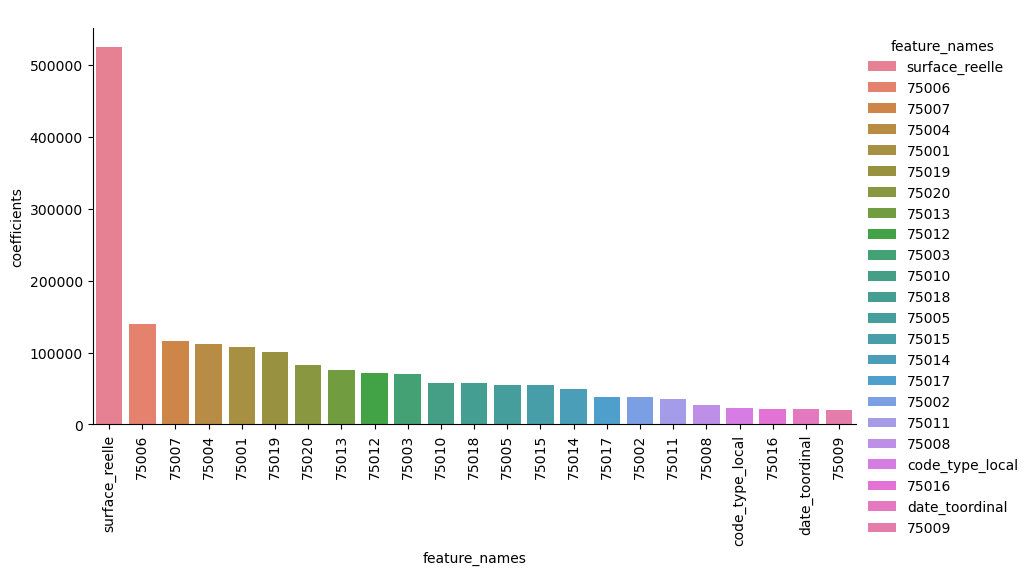

In [159]:
# Convertir les coefficients en valeurs absolues
feature_importance["coefficients"] = feature_importance["coefficients"].abs()

# Visualiser les features triées avec une rotation de 90 degrés pour les labels
sns.catplot(
    x="feature_names",
    y="coefficients",
    data=feature_importance.sort_values(by="coefficients", ascending=False),
    kind="bar",
    aspect=16/9,
    hue="feature_names"
)

# Ajouter la rotation des labels de l'axe X
plt.xticks(rotation=90)
plt.show()

PARTIE PORTEFEUILLE ACTIF

In [160]:
df_port = pd.read_excel('portefeuille_actifs.xlsx')

display(df_port.head())

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.48,2,Appartement,65,3,2.364855,48.859318
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.29,2,Appartement,74,2,2.301586,48.868893
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.58,2,Appartement,22,1,2.311643,48.875490


In [161]:
df_port.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   adresse_numero             275 non-null    int64  
 1   adresse_nom_voie           275 non-null    object 
 2   code_postal                275 non-null    int64  
 3   code_commune               275 non-null    int64  
 4   nom_commune                275 non-null    object 
 5   surface_carrez             275 non-null    float64
 6   code_type_local            275 non-null    int64  
 7   type_local                 275 non-null    object 
 8   surface_reelle_bati        275 non-null    int64  
 9   nombre_pieces_principales  275 non-null    int64  
 10  longitude                  275 non-null    float64
 11  latitude                   275 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 25.9+ KB


In [162]:
print(df_port.duplicated().sum())

2


In [163]:
df_clean_port = df_port.drop(['adresse_numero', 'adresse_nom_voie','code_commune','nom_commune','surface_reelle_bati', 'nombre_pieces_principales','longitude','latitude'], axis=1)
df_clean_port

,code_postal,surface_carrez,code_type_local,type_local
0,75001,16.41,2,Appartement
1,75003,20.47,2,Appartement
2,75003,64.48,2,Appartement
3,75008,63.29,2,Appartement
4,75008,20.58,2,Appartement
...,...,...,...,...
270,75019,14.12,4,Local industriel. commercial ou assimilé
271,75002,14.10,4,Local industriel. commercial ou assimilé
272,75002,34.85,4,Local industriel. commercial ou assimilé
273,75002,41.61,4,Local industriel. commercial ou assimilé


In [164]:
# Création colonne date_mutation au 2025_03_06
df_clean_port['date_mutation'] = pd.Timestamp('2025-03-06')
df_clean_port

,code_postal,surface_carrez,code_type_local,type_local,date_mutation
0,75001,16.41,2,Appartement,2025-03-06
1,75003,20.47,2,Appartement,2025-03-06
2,75003,64.48,2,Appartement,2025-03-06
3,75008,63.29,2,Appartement,2025-03-06
4,75008,20.58,2,Appartement,2025-03-06
...,...,...,...,...,...
270,75019,14.12,4,Local industriel. commercial ou assimilé,2025-03-06
271,75002,14.10,4,Local industriel. commercial ou assimilé,2025-03-06
272,75002,34.85,4,Local industriel. commercial ou assimilé,2025-03-06
273,75002,41.61,4,Local industriel. commercial ou assimilé,2025-03-06


In [165]:
df_clean_port.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype        
---  ------           --------------  -----        
 0   code_postal      275 non-null    int64        
 1   surface_carrez   275 non-null    float64      
 2   code_type_local  275 non-null    int64        
 3   type_local       275 non-null    object       
 4   date_mutation    275 non-null    datetime64[s]
dtypes: datetime64[s](1), float64(1), int64(2), object(1)
memory usage: 10.9+ KB


In [166]:
# création colonne date en toordinal
df_clean_port['date_toordinal'] = df_clean_port.date_mutation. apply(lambda date: np.uint32(date.toordinal()))
df_clean_port

,code_postal,surface_carrez,code_type_local,type_local,date_mutation,date_toordinal
0,75001,16.41,2,Appartement,2025-03-06,739316
1,75003,20.47,2,Appartement,2025-03-06,739316
2,75003,64.48,2,Appartement,2025-03-06,739316
3,75008,63.29,2,Appartement,2025-03-06,739316
4,75008,20.58,2,Appartement,2025-03-06,739316
...,...,...,...,...,...,...
270,75019,14.12,4,Local industriel. commercial ou assimilé,2025-03-06,739316
271,75002,14.10,4,Local industriel. commercial ou assimilé,2025-03-06,739316
272,75002,34.85,4,Local industriel. commercial ou assimilé,2025-03-06,739316
273,75002,41.61,4,Local industriel. commercial ou assimilé,2025-03-06,739316


In [167]:
# Annualtion colonne date_mutation
df_clean_port = df_clean_port.drop(['date_mutation'], axis=1)
df_clean_port

,code_postal,surface_carrez,code_type_local,type_local,date_toordinal
0,75001,16.41,2,Appartement,739316
1,75003,20.47,2,Appartement,739316
2,75003,64.48,2,Appartement,739316
3,75008,63.29,2,Appartement,739316
4,75008,20.58,2,Appartement,739316
...,...,...,...,...,...
270,75019,14.12,4,Local industriel. commercial ou assimilé,739316
271,75002,14.10,4,Local industriel. commercial ou assimilé,739316
272,75002,34.85,4,Local industriel. commercial ou assimilé,739316
273,75002,41.61,4,Local industriel. commercial ou assimilé,739316


In [168]:
# Renommer une colonne surface_carrez en surface_reelle
df_clean_port.rename(columns={'surface_carrez': 'surface_reelle'}, inplace=True)
df_clean_port

,code_postal,surface_reelle,code_type_local,type_local,date_toordinal
0,75001,16.41,2,Appartement,739316
1,75003,20.47,2,Appartement,739316
2,75003,64.48,2,Appartement,739316
3,75008,63.29,2,Appartement,739316
4,75008,20.58,2,Appartement,739316
...,...,...,...,...,...
270,75019,14.12,4,Local industriel. commercial ou assimilé,739316
271,75002,14.10,4,Local industriel. commercial ou assimilé,739316
272,75002,34.85,4,Local industriel. commercial ou assimilé,739316
273,75002,41.61,4,Local industriel. commercial ou assimilé,739316


In [169]:
# separate target
features_list = ['code_postal','code_type_local','surface_reelle','date_toordinal']
x_port = df_clean_port.loc[:,features_list]

print(x_port)

     code_postal  code_type_local  surface_reelle  date_toordinal
0          75001                2           16.41          739316
1          75003                2           20.47          739316
2          75003                2           64.48          739316
3          75008                2           63.29          739316
4          75008                2           20.58          739316
..           ...              ...             ...             ...
270        75019                4           14.12          739316
271        75002                4           14.10          739316
272        75002                4           34.85          739316
273        75002                4           41.61          739316
274        75004                4           20.40          739316

[275 rows x 4 columns]


In [170]:
x_port_scaled = feature_encoder.transform(x_port)

y_port_pred = regressor.predict(x_port_scaled)
y_port_pred

array([ 374755.37357783,  380220.31086456,  853278.12398305,
        797805.83242186,  338721.55161544,  476522.07795443,
        389679.31735273,  621149.36521853,  152240.64790259,
        171854.34300315,  336798.76313195,  225598.69804956,
        496354.97280077,  335882.11460479,  363121.48880651,
       1073471.49018205, 1092655.48135976,  452714.55650309,
       1002016.89652334,  402014.91678523,  405964.75358531,
        552397.79511581,  107740.32192416,  464653.58929599,
        179057.93349971,  485936.35389436,  826517.32631483,
        777180.00838223,  543960.79537903,  204200.65876849,
        199048.98665663,  454434.37586457,  624868.50618071,
        293631.26556572, 1149831.35797584,  263104.47189936,
        533395.61389172,  205498.3092622 ,  262244.56221861,
        226492.02611438,  396666.08350876,  350715.5565976 ,
        412415.92311122,  180187.71252672,  372858.23087672,
        345118.35770018,  257192.59284425,  311001.47270968,
        277195.12581446,

In [171]:
df_clean_port['valeur_fonciere'] = y_port_pred
df_clean_port

,code_postal,surface_reelle,code_type_local,type_local,date_toordinal,valeur_fonciere
0,75001,16.41,2,Appartement,739316,374755.373578
1,75003,20.47,2,Appartement,739316,380220.310865
2,75003,64.48,2,Appartement,739316,853278.123983
3,75008,63.29,2,Appartement,739316,797805.832422
4,75008,20.58,2,Appartement,739316,338721.551615
...,...,...,...,...,...,...
270,75019,14.12,4,Local industriel. commercial ou assimilé,739316,228664.495635
271,75002,14.10,4,Local industriel. commercial ou assimilé,739316,366471.194884
272,75002,34.85,4,Local industriel. commercial ou assimilé,739316,589510.268327
273,75002,41.61,4,Local industriel. commercial ou assimilé,739316,662172.636350


In [172]:
df_clean_port['prix_m2'] = df['valeur_fonciere'] / df['surface_reelle']
df_clean_port

,code_postal,surface_reelle,code_type_local,type_local,date_toordinal,valeur_fonciere,prix_m2
0,75001,16.41,2,Appartement,739316,374755.373578,11011.193562
1,75003,20.47,2,Appartement,739316,380220.310865,9671.732877
2,75003,64.48,2,Appartement,739316,853278.123983,9966.020548
3,75008,63.29,2,Appartement,739316,797805.832422,11367.582877
4,75008,20.58,2,Appartement,739316,338721.551615,11751.113836
...,...,...,...,...,...,...,...
270,75019,14.12,4,Local industriel. commercial ou assimilé,739316,228664.495635,12668.781370
271,75002,14.10,4,Local industriel. commercial ou assimilé,739316,366471.194884,11868.747123
272,75002,34.85,4,Local industriel. commercial ou assimilé,739316,589510.268327,11881.145068
273,75002,41.61,4,Local industriel. commercial ou assimilé,739316,662172.636350,10085.050685


In [173]:
df_clean_port.describe(include="all")

,code_postal,surface_reelle,code_type_local,type_local,date_toordinal,valeur_fonciere,prix_m2
count,275.000000,275.000000,275.000000,275,275.0,2.750000e+02,275.000000
unique,NaN,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,NaN,Appartement,NaN,NaN,NaN
freq,NaN,NaN,NaN,154,NaN,NaN,NaN
mean,75012.425455,45.025091,2.880000,NaN,739316.0,5.870341e+05,11050.006246
std,5.712460,38.430799,0.994584,NaN,0.0,4.335039e+05,867.999441
min,75001.000000,5.160000,2.000000,NaN,739316.0,1.029813e+05,9671.732877
25%,75009.000000,21.750000,2.000000,NaN,739316.0,3.446832e+05,10121.995890
50%,75013.000000,34.590000,2.000000,NaN,739316.0,4.646536e+05,11306.180137
75%,75017.500000,52.930000,4.000000,NaN,739316.0,6.644965e+05,11611.854452


In [174]:
df_clean.describe(include="all")

,date_mutation,valeur_fonciere,code_postal,code_type_local,type_local,surface_reelle,prix_m2,date_toordinal
count,26196,2.619600e+04,26196.000000,26196.000000,26196,26196.000000,26196.000000,26196.000000
unique,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,Appartement,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,24353,NaN,NaN,NaN
mean,2019-06-09 14:09:14.099862784,4.916170e+05,75012.716216,2.140709,NaN,46.859940,10325.993289,737219.589747
min,2017-01-02 00:00:00,8.519470e+04,75001.000000,2.000000,NaN,11.000000,7196.488356,736331.000000
25%,2018-03-14 00:00:00,2.339439e+05,75009.000000,2.000000,NaN,23.000000,9320.798801,736767.000000
50%,2019-05-23 00:00:00,3.545774e+05,75014.000000,2.000000,NaN,35.000000,10035.672260,737202.000000
75%,2020-09-16 00:00:00,5.702197e+05,75017.000000,2.000000,NaN,55.000000,10941.129041,737684.000000
max,2021-12-31 00:00:00,3.843359e+07,75020.000000,4.000000,NaN,3945.000000,15547.797808,738155.000000


In [175]:
# Exporter le DataFrame vers un fichier Excel
df_clean_port.to_excel('portefeuille_pred.xlsx', index=False)

print("Le DataFrame a été exporté vers 'portefeuille_pred.xlsx'.")

Le DataFrame a été exporté vers 'portefeuille_pred.xlsx'.
